In [1]:
import os
from PIL import Image                       # package to manipulate and import images   
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#from skimage import io, transform          # scikit image package, --- not neccessary, we are using PIL (Pillow)

import torch                                # package for deeplearning
from torch.utils.data import DataLoader     # pytorch dataloader for easily loading minibatches during training
import torchvision                          # package for using images in deeplearning (computer vision)

from dataset import train_dataset           # script for creating custom dataset




# Exploring the Data (Images)  
### Convert single image to tensor and plot tensor

In [23]:
image = Image.open('/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.1.jpg') ### image path on local device

In [24]:
image.getpalette # images are CMYK instead of RGB

<bound method Image.getpalette of <PIL.JpegImagePlugin.JpegImageFile image mode=CMYK size=335x400 at 0x1A245D49D0>>

In [25]:
image.show() # view image

In [26]:
# to convert from CMYK to RGB
if image.mode == 'CMYK':
    image = image.convert('RGB')
    
image.show()

In [27]:
transform = torchvision.transforms.ToTensor() # create transform that changes image to tensor

In [28]:
image = transform(image) # transform image to tensor

In [29]:
image.size() # view image-tensor dimensions, there are 3 channels now (RGB) and the image 
             # is 400 pixels by 335 pixels

torch.Size([3, 400, 335])

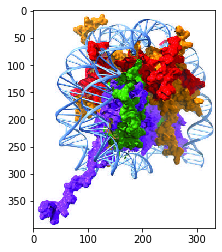

In [31]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(image))   # plot image-tensor 
                                                                    #(note the same as origional image)

# Test Dataset Class   
### Changing images to tensors and create dataloader  
Class has been created created. Here are the outstanding issues:  
  
  1) need to add the rest of the training images    
  2) need to add captions, questions and answers  
  

#### Below is used for testing:

In [2]:
#create Dataset class
train_set = train_dataset(root_dir = '/Users/ianleefmans/Desktop/data/train/part1/Images',
                         transform = torchvision.transforms.ToTensor(), channel='RGB')



/Users/ianleefmans/Desktop/data/train/part1/Images/img_862.jpg


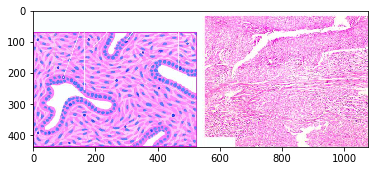

In [11]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(train_set[819 + 850]['image'])) #plot indexed imaged
                                                                                         #from dataset

In [6]:
#define custom collate function
def my_collate(batch):
    data = [item for item in batch]
    #target = [item[1] for item in batch]
    #target = torch.LongTensor(target)
    return data

# create dataloader
trainset = DataLoader(dataset=train_set,
                      batch_size=4,
                      shuffle=True,
                      collate_fn=my_collate) # use custom collate function here
                      #pin_memory=True)

In [9]:
sample = iter(trainset).next() #iterate to next minibatch from dataloader
print(sample[2]['image'].size()) # show size of one picture in the minibatch


/Users/ianleefmans/Desktop/data/train/part1/Images/img_663.jpg
/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.130.jpg
/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.764.jpg
/Users/ianleefmans/Desktop/data/train/part1/Images/Fig.626.jpg
torch.Size([3, 316, 336])


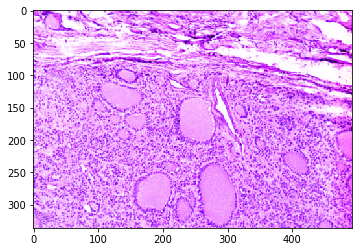

In [12]:
plt.imshow(torchvision.transforms.ToPILImage(mode='RGB')(sample[3]['image'])) #plot image from minibatch

#### Testing for import of 3rd trainset:


In [23]:
images_list = []
for i in range(3329):
    for j in range(78):
        path = os.path.join(f'/Users/ianleefmans/Desktop/data/train/part2/part2_images/{str(j)}', f'{str(i)}.jpg')
        try:
            images_list.append(Image.open(path))
        except:
            pass
        finally:
            pass

In [24]:
len(images_list)

3329